In [2]:
!pip install pandas numpy matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Chargement du dataset
df = pd.read_csv('../HR_Analytics_Structure_Complet.csv')

# Aperçu des données
print("Aperçu des données :")
display(df.head())

Defaulting to user installation because normal site-packages is not writeable
Aperçu des données :


,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AnnualIncome,Attrition_Numeric
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,0,8,0,1,6,4,0,5,71916,1
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,1,10,3,3,10,7,1,7,61560,0
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,0,7,3,3,0,0,0,0,25080,1
3,5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,0,8,3,3,8,7,3,0,34908,0
4,7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,1,6,3,3,2,2,2,2,41616,0


In [3]:
# Sélection des variables
# X = Variable explicative (Années d'expérience)
# y = Variable cible (Salaire mensuel)
X = df[['TotalWorkingYears']] 
y = df['MonthlyIncome']

# Division en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensions X_train : {X_train.shape}, X_test : {X_test.shape}")

Dimensions X_train : (1084, 1), X_test : (272, 1)


In [4]:
# Création du modèle
model = LinearRegression()

# Entraînement
model.fit(X_train, y_train)

# Affichage des paramètres du modèle
print(f"Coefficient (a) : {model.coef_[0]:.2f}")
print(f"Intercept (b)   : {model.intercept_:.2f}")
print(f"Équation : Salaire = {model.coef_[0]:.2f} * Expérience + {model.intercept_:.2f}")

Coefficient (a) : 328.46
Intercept (b)   : 2183.62
Équation : Salaire = 328.46 * Expérience + 2183.62


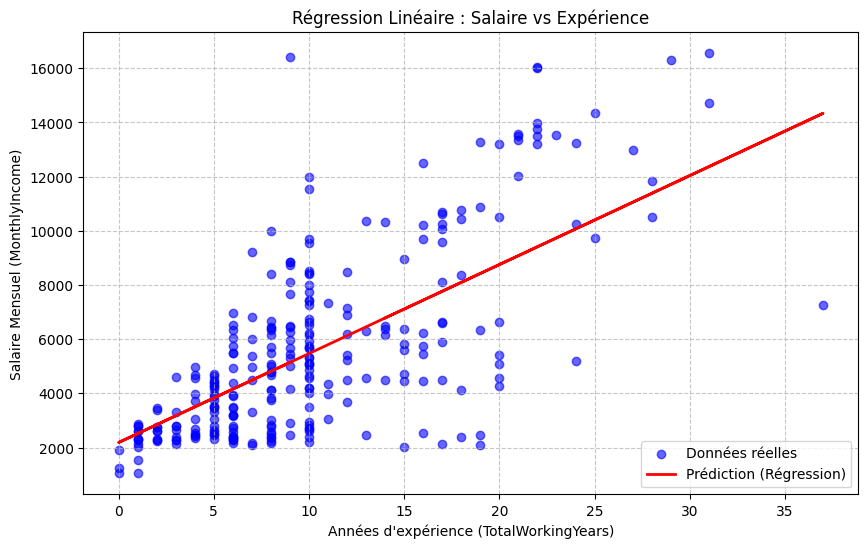

In [5]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Visualisation graphique
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Données réelles', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prédiction (Régression)')
plt.title('Régression Linéaire : Salaire vs Expérience')
plt.xlabel('Années d\'expérience (TotalWorkingYears)')
plt.ylabel('Salaire Mensuel (MonthlyIncome)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Affichage du rapport de performance
print("="*30)
print(" BENCHMARK DU MODÈLE")
print("="*30)
print(f"R² (Score de détermination) : {r2:.4f}")
print("-" * 30)
print(f"MAE  (Erreur Absolue Moyenne)      : {mae:.2f}")
print(f"RMSE (Racine Erreur Quadratique)   : {rmse:.2f}")
print(f"MAPE (Erreur Pourcentage Moyenne)  : {mape:.2f} %")
print("="*30)

 BENCHMARK DU MODÈLE
R² (Score de détermination) : 0.4941
------------------------------
MAE  (Erreur Absolue Moyenne)      : 1824.91
RMSE (Racine Erreur Quadratique)   : 2446.87
MAPE (Erreur Pourcentage Moyenne)  : 39.45 %


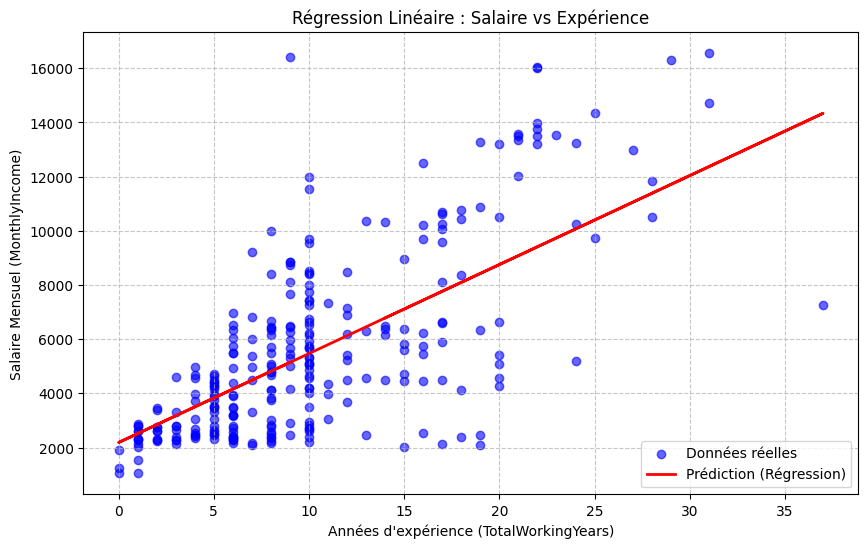

In [6]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Visualisation graphique
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Données réelles', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prédiction (Régression)')
plt.title('Régression Linéaire : Salaire vs Expérience')
plt.xlabel('Années d\'expérience (TotalWorkingYears)')
plt.ylabel('Salaire Mensuel (MonthlyIncome)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [11]:
def predire_salaire(annees_experience):
    """
    Fonction qui simule l'action de l'interface graphique.
    Elle prend une entrée utilisateur (années) et retourne la prédiction.
    """
    # Le modèle attend un format 2D [[valeur]], d'où le reshape ou les doubles crochets
    prediction = model.predict([[annees_experience]])
    salaire_estime = prediction[0]
    return salaire_estime

# --- Zone de Test ---
# Imaginez que l'utilisateur entre "10" dans votre interface
experience_utilisateur = 5

resultat = predire_salaire(experience_utilisateur)

print(f"Simulation Interface :")
print(f"Si l'utilisateur entre {experience_utilisateur} ans d'expérience...")
print(f"Le modèle prédit un salaire de : {resultat:.2f} DH")

Simulation Interface :
Si l'utilisateur entre 5 ans d'expérience...
Le modèle prédit un salaire de : 3825.90 DH


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
import joblib

# Nom du fichier de sauvegarde
nom_fichier = 'modele_salaire_lineaire.pkl'

# Sauvegarde du modèle entraîné
joblib.dump(model, nom_fichier)

print(f"Modèle sauvegardé avec succès sous le nom : {nom_fichier}")


Modèle sauvegardé avec succès sous le nom : modele_salaire_lineaire.pkl
